# $Ti_2AlC$ DFT计算验证

## 1. Convergence Test

### 1.1 ecutwfc convergence test

In [ ]:
from convergence_test import ABACUSConvergenceTest

conv_test = ABACUSConvergenceTest()
conv_test.ecut_run(ecut_min=50, ecut_max=130, ecut_interval=10)
conv_test.ecut_postprocessing()
conv_test.ecut_generate_plot()

### 1.2 kspacing convergence test


Starting kspacing test from 0.05 to 0.15 1/Bohr with interval 0.01 1/Bohr

Testing kspacing (10 points)
-> Processing kspacing = 0.05 1/Bohr (1/10)
Abacus completed successfully, time used: 3 min 58 sec
-> Processing kspacing = 0.06 1/Bohr (2/10)
Abacus completed successfully, time used: 2 min 30 sec
-> Processing kspacing = 0.07 1/Bohr (3/10)
Abacus completed successfully, time used: 2 min 3 sec
-> Processing kspacing = 0.08 1/Bohr (4/10)
Abacus completed successfully, time used: 1 min 51 sec
-> Processing kspacing = 0.09 1/Bohr (5/10)
Abacus completed successfully, time used: 1 min 18 sec
-> Processing kspacing = 0.1 1/Bohr (6/10)
Abacus completed successfully, time used: 1 min 13 sec
-> Processing kspacing = 0.11 1/Bohr (7/10)
Abacus completed successfully, time used: 1 min 15 sec
-> Processing kspacing = 0.12 1/Bohr (8/10)
Abacus completed successfully, time used: 1 min 4 sec
-> Processing kspacing = 0.13 1/Bohr (9/10)
Abacus completed successfully, time used: 0 min 57 sec
-> Proc

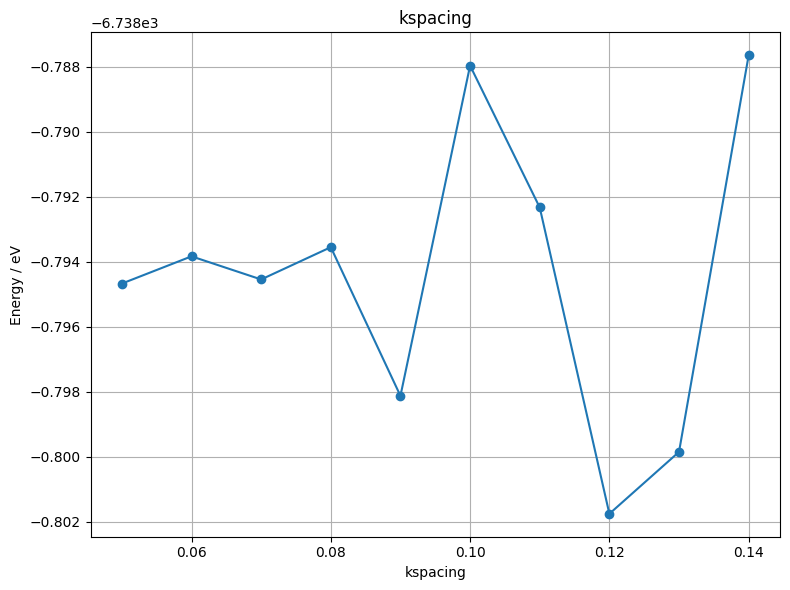

In [1]:
from convergence_test import ABACUSConvergenceTest

conv_test = ABACUSConvergenceTest()
conv_test.kpoint_run(kspacing_min=0.05, kspacing_max=0.15, kspacing_interval=0.01)
conv_test.kpoint_postprocessing()
conv_test.kpoint_generate_plot()

### 1.3 kspacing convergence test (x, y, z)

In [ ]:
from convergence_test import ABACUSConvergenceTest

conv_test = ABACUSConvergenceTest()
conv_test.kpoint_xyz_run(kspacing_min_xyz=[0.05, 0.05, 0.05], kspacing_max_xyz=[0.15, 0.15, 0.15], kspacing_interval_xyz=0.01)
conv_test.kpoint_xyz_postprocessing()
conv_test.kpoint_xyz_generate_plot()

## 2. Cell-relax

- 使用如下命令运行 Abacus 进行松弛

In [ ]:
! cd relax && abacus

- 使用 ASE 计算晶格常数以及晶胞体积

In [ ]:
# install ase-abacus first
! pip install git+https://gitlab.com/1041176461/ase-abacus.git

In [ ]:
from ase.io import read
from pathlib import Path

cs_dir = "relax"

cs_stru_original = Path(cs_dir, "STRU")
cs_atoms_original = read(cs_stru_original, format="abacus")

lattice_params_original = cs_atoms_original.cell.cellpar()
volume_original = cs_atoms_original.cell.volume

cs_stru_relaxed = Path(cs_dir, "OUT.ABACUS", "STRU_ION_D")
cs_atoms_relaxed = read(cs_stru_relaxed, format="abacus")

lattice_params_relaxed = cs_atoms_relaxed.cell.cellpar()
volume_relaxed = cs_atoms_relaxed.cell.volume

# format: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]
print("Original lattice_params: ", lattice_params_original)
print("Relaxed lattice_params: ", lattice_params_relaxed)
print("Original volume: ", volume_original)
print("Relaxed volume: ", volume_relaxed)

In [ ]:
from ase.visualize import view
view(cs_atoms_relaxed, viewer='ngl')